<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/pca_finding_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Tutorial: Using Permutation Testing to Determine Significant Principal Components**

(Fayyaz Minhas)

---

#### **1. Introduction to the Problem**
When applying **Principal Component Analysis (PCA)** to a dataset, the goal is to reduce dimensionality while preserving as much variance as possible. However, it can be challenging to determine how many principal components represent **meaningful structure** rather than **random noise**.

A method to evaluate this is described in Björklund (2019). The idea is as follows:
> By randomizing the values of each “feature” between “examples,” the structure of the original data is destroyed. Any significant principal components from the randomized dataset indicate the level of variance that can be attributed to random chance. We then compare these randomized eigenvalues to those from the original data.

This approach provides a benchmark for deciding which principal components to retain.

---

#### **2. Load and Preprocess the Data**
We use the MNIST dataset in this tutorial.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from tqdm import tqdm

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.to_numpy() / 255.0  # Normalize pixel values



#### **3. Perform PCA on the Original Data**
We will keep the top `n_components` principal components.



In [2]:
n_components = 100

# Step 1: Perform PCA on the original data
pca_original = PCA(n_components=n_components)
pca_original.fit(X)
explained_variance_original = pca_original.explained_variance_ratio_



#### **4. Generate Multiple Randomized Datasets**
We shuffle the rows within each column (feature) multiple times and perform PCA on each randomized dataset.


In [3]:
# Step 2: Generate multiple randomized datasets and compute eigenvalues
num_randomizations = 10
randomized_eigenvalues = []

for _ in tqdm(range(num_randomizations)):
    X_randomized = X.copy()
    for i in range(X.shape[1]):
        np.random.shuffle(X_randomized[:, i])  # Shuffle each feature independently

    # Perform PCA on the randomized data
    pca_random = PCA(n_components=n_components)
    pca_random.fit(X_randomized)
    randomized_eigenvalues.append(pca_random.explained_variance_ratio_)

randomized_eigenvalues = np.array(randomized_eigenvalues)

100%|██████████| 10/10 [00:53<00:00,  5.38s/it]




#### **5. Compute Mean and Confidence Intervals**
We calculate the mean and standard deviation of the explained variance from the randomized datasets. This allows us to compute a 95% confidence interval.


In [5]:
# Step 3: Compute mean and confidence intervals for the randomized data
mean_randomized = np.mean(randomized_eigenvalues, axis=0)
std_randomized = np.std(randomized_eigenvalues, axis=0)



#### **6. Scree Plot and the Elbow Method**
The scree plot shows the proportion of variance explained by each principal component. Use the elbow method to identify the point where adding more components provides diminishing returns.


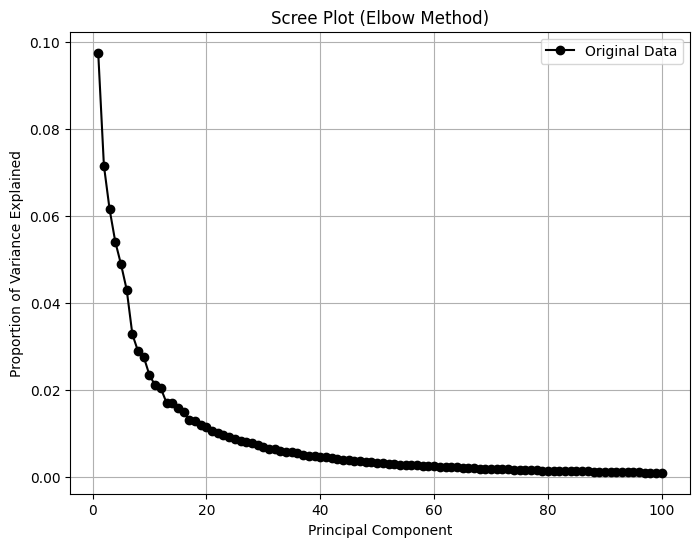

Use the elbow method to select the number of components where the curve bends or flattens.


In [6]:
# Scree plot of explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components + 1), explained_variance_original, marker='o', linestyle='-', color='black', label='Original Data')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot (Elbow Method)')
plt.legend()
plt.grid(True)
plt.show()

print("Use the elbow method to select the number of components where the curve bends or flattens.")


#### **7. Compare the Original and Randomized Eigenvalues**
We plot the eigenvalues of the original dataset alongside the randomized data, highlighting where they significantly exceed random chance.



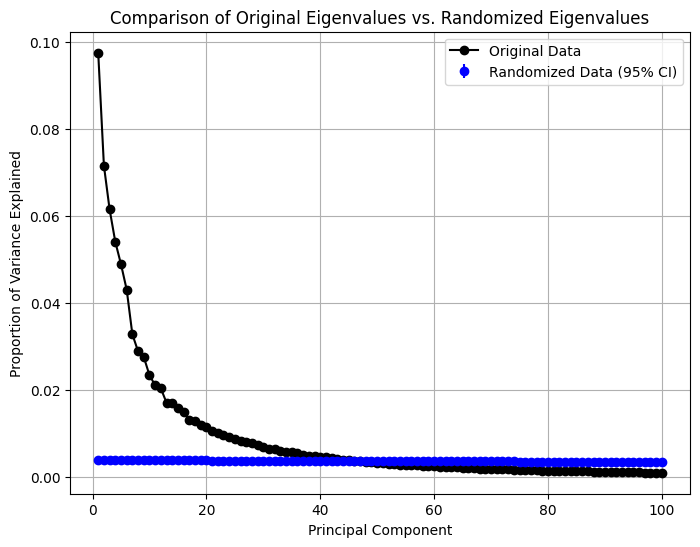

In [7]:
# Step 4: Plot original eigenvalues vs. randomized estimates
plt.figure(figsize=(8, 6))
plt.errorbar(range(1, len(explained_variance_original) + 1), mean_randomized[:len(explained_variance_original)],
             yerr=1.96 * std_randomized[:len(explained_variance_original)], label='Randomized Data (95% CI)', fmt='o', color='blue')
plt.plot(range(1, len(explained_variance_original) + 1), explained_variance_original, 'o-', label='Original Data', color='black')

# Add labels and legend
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Comparison of Original Eigenvalues vs. Randomized Eigenvalues')
plt.legend()
plt.grid(True)
plt.show()


#### **8. Select the Optimal Number of Components**
We can also select the optimal number of components by retaining only those where the variance in the original data is significantly higher than the randomized expectation.


In [8]:
# Optimal number of components where original variance exceeds randomized variance
optimal_components = np.sum(explained_variance_original > (mean_randomized + 1.96 * std_randomized))

print(f"Optimal number of components to retain (above random expectation): {optimal_components}")

Optimal number of components to retain (above random expectation): 46



#### **9. Interpretation**
- **Scree Plot:** Select the number of components using the elbow method, where the curve flattens.
- **Randomized Comparison:** Alternatively, select components where the variance in the original data exceeds the randomized confidence interval.

---

#### **10. Reference**
Björklund, Mats. “Be Careful with Your Principal Components.” *Evolution* 73, no. 10 (2019): 2151–58. [https://doi.org/10.1111/evo.13835](https://doi.org/10.1111/evo.13835)

See also: https://github.com/foxtrotmike/CS909/blob/master/RMT.ipynb

---

This completes the tutorial! You can adjust the number of components and randomizations to see how it affects the results.
